In [1]:
colab = False

if colab:
    from google.colab import drive
    drive.mount('/content/gdrive')
    !git clone https://github.com/deepmind/pycolab.git
    !git clone https://github.com/nicoladainese96/RelationalDeepRL.git
    !pip install pycolab

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
if colab: 
    import sys
    sys.path.insert(0, 'RelationalDeepRL')

from RelationalModule import ActorCritic, ControlActorCritic
from Utils import train_agent_sandbox as train
from Utils import test_env
from importlib import reload

In [3]:
def random_start(X=10, Y=10):
    s1, s2 = np.random.choice(X*Y, 2, replace=False)
    initial = [s1//X, s1%X]
    goal = [s2//X, s2%X]
    return initial, goal

In [4]:
# Variable parameters
X = 10
Y = 10
initial, goal = random_start(X, Y)

# All game parameters
game_params = dict(x=X, y=Y, initial=initial, goal=goal, max_steps=50, greyscale_state=True)

In [5]:
HPs = dict(action_space=4, lr=0.003, gamma=0.99, TD=True, twin=True, tau=0.2, n_steps=40,
           n_kernels=96, vocab_size = 117, n_dim=12, n_features=64, n_heads=4, n_attn_modules=2, 
           n_linears=4, max_pool=False, linear_size=X)
if colab:
    HPs['device'] = 'cuda'
else:
    HPs['device'] = 'cpu'
    
# Relational Agent
agent = ActorCritic.BoxWorldA2C(**HPs)

In [6]:
reload(train)

<module 'Utils.train_agent_sandbox' from '/home/nicola/Nicola_unipd/MasterThesis/RelationalDeepRL/Utils/train_agent_sandbox.py'>

In [7]:
env = test_env.Sandbox(**game_params)
rewards, log_probs, distributions, states, done, bootstrap = train.play_episode(agent, env, max_steps=50)

In [8]:
print("rewards: ", rewards.shape)
print("log_probs: ", len(log_probs))
print("distributions: ", len(distributions))
print("states: ", states.shape)
print("done: ", done.shape)
print("bootstrap: ", bootstrap.shape)

rewards:  (50,)
log_probs:  50
distributions:  50
states:  (51, 1, 10, 10)
done:  (50,)
bootstrap:  (50,)


In [9]:
print("rewards: \n", rewards)
print("log_probs: \n", log_probs)
print("distributions: \n", distributions)
print("states: \n", states)
print("done: \n", done)
print("bootstrap: \n", bootstrap)

rewards: 
 [ 0  0 -1  0  0 -1  0  0  0  0  0  0  0  0  0  0  0 -1  0  0 -1 -1  0  0
  0 -1  0  0  0  0  0 -1  0  0  0 -1  0  0  0  0  0  0  0 -1  0  0  0  0
  0  0]
log_probs: 
 [tensor(-0.4518, grad_fn=<SelectBackward>), tensor(-0.4462, grad_fn=<SelectBackward>), tensor(-0.6891, grad_fn=<SelectBackward>), tensor(-1.3542, grad_fn=<SelectBackward>), tensor(-0.6778, grad_fn=<SelectBackward>), tensor(-1.9877, grad_fn=<SelectBackward>), tensor(-1.9982, grad_fn=<SelectBackward>), tensor(-1.5862, grad_fn=<SelectBackward>), tensor(-0.9418, grad_fn=<SelectBackward>), tensor(-0.9508, grad_fn=<SelectBackward>), tensor(-1.3853, grad_fn=<SelectBackward>), tensor(-2.0988, grad_fn=<SelectBackward>), tensor(-1.7523, grad_fn=<SelectBackward>), tensor(-1.0987, grad_fn=<SelectBackward>), tensor(-1.3572, grad_fn=<SelectBackward>), tensor(-1.3141, grad_fn=<SelectBackward>), tensor(-1.5587, grad_fn=<SelectBackward>), tensor(-1.0980, grad_fn=<SelectBackward>), tensor(-1.4323, grad_fn=<SelectBackward>), tens

Variables log_probs and distributions have a gradient attached, as it should be. Distributions is used only if the entropy regularization is active.

In [10]:
agent.update(rewards, log_probs, distributions, states, done, bootstrap)

(20.554664611816406, -116.46737670898438)

# Training cycle

In [13]:
reload(train)

<module 'Utils.train_agent_sandbox' from '/home/nicola/Nicola_unipd/MasterThesis/RelationalDeepRL/Utils/train_agent_sandbox.py'>

In [14]:
results = train.train_sandbox(agent, game_params, n_episodes = 100, max_steps=50, return_agent=False)

Episode 10 - reward: -16.50
Episode 20 - reward: -11.80
Episode 30 - reward: -6.70
Episode 40 - reward: -6.80
Episode 50 - reward: -5.30
Episode 60 - reward: -5.30
Episode 70 - reward: -2.50
Episode 80 - reward: -5.30
Episode 90 - reward: 1.00
Episode 100 - reward: 1.00


In [16]:
score, asymptotic_score, asymptotic_std = results

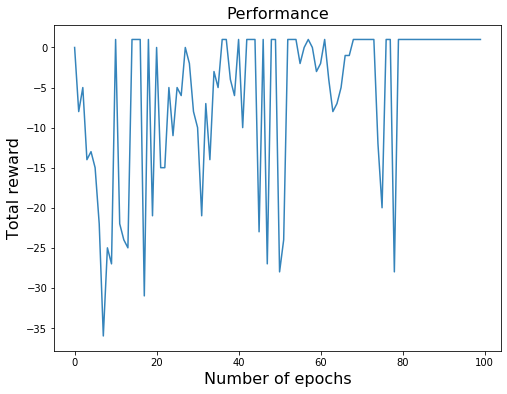

In [20]:
plt.figure(figsize=(8,6))
n_epochs = np.arange(len(score))
plt.plot(n_epochs, score, alpha=0.9)
plt.title("Performance", fontsize=16)
plt.xlabel("Number of epochs", fontsize=16)
plt.ylabel("Total reward", fontsize=16)
plt.show()